# Univariate Linear Regression with Batch Gradient Descent
*By Carlos Santiago Bañón*

**Year:** 2020

**Technologies:** Python, NumPy, Matplotlib

**Discipline(s):** Machine Learning

**Keywords:** `batch-gradient-descent`, `gradient-descent`, `linear-regression`, `machine-learning`, `regression`


This notebook provides an implementation of univariate linear regression with batch gradient descent from scratch.

## 1. Import Statements
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Random Data Generation
---

To more easily visualize the data we are working with, we will be generating random data based on the specific linear function $f(x) = 2x + 3$. Doing so will allow us to better visualize the regression line after we train our model.

In [2]:
def f(X):
  return (2 * X) + 3

In [3]:
# Generate 100 training examples.
m = 100
X = np.random.rand(m, 1)
y = f(X) + np.random.rand(m, 1)

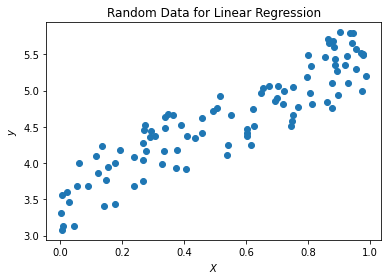

In [4]:
# Plot the random data.
plt.scatter(X, y)
plt.title('Random Data for Linear Regression')
plt.xlabel(r'$X$')
plt.ylabel(r'$y$')
plt.show()

## 3. Batch Gradient Descent
---

Once we have our data ready, we must define the optimization algorithm we will be using in our linear regression model.

Here, we will employ **Batch Gradient Descent**, which will help us minimize the parameters in our hypothesis function for linear regression.

Therefore, we begin by defining the **Mean Squared Error (MSE)** loss function, which will be our cost function for batch gradient descent algorithm:

$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i = 1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2$

In [5]:
def cost_function(X, y, theta):
  
  m = len(y)

  # Calculate the hypothesis.
  h = np.dot(X, theta)

  # Calculate the squared error.
  squared_error = (h - y) ** 2

  # Sum all the squared errors and multiply by the reciprocal.
  J = (1 / 2 * m) * np.dot(np.ones(m), squared_error)

  return J

Now, we're ready to formally define our batch gradient descent algorithm. Here, we employ the following instruction repeatedly for a certain number of iterations until our cost function is minimized:

$\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$

In [6]:
def batch_gradient_descent(X, y, theta, alpha, iterations):

  m = len(y)
  J_history = np.zeros((iterations, 1));

  for i in range(iterations):

    # Calculate the hypothesis.
    h = np.dot(X, theta)

    # Calculate the loss.
    loss = h - y

    # Calculate the gradient.
    gradient = np.dot(X.T, loss) / m

    # Adjust theta accordingly.
    theta = theta - alpha * gradient

    J_history[i] = cost_function(X, y, theta)
  
  # Plot the cost function.
  plt.title('Cost Function')
  plt.xlabel('Iterations')
  plt.ylabel(r'$J(\theta)$')
  x = np.linspace(0, iterations, iterations)
  plt.plot(x, J_history)
  plt.show()

  return theta

## 4. Linear Regression
---

Once our minimization algorithm is defined, we can proceed to build our linear regression model.

In [7]:
def linear_regression(X, y):

  # Set up our initial values.
  alpha = 0.01
  iterations = 500
  theta = np.zeros((2, 1))

  # Add an extra column of ones for vectorization.
  X_train = np.append(np.ones((m, 1)), X, axis = 1)

  # Calculate the cost.
  J = cost_function(X_train, y, theta)

  # Use batch gradient descent to minimize the cost.
  theta = batch_gradient_descent(X_train, y, theta, alpha, iterations)

  return theta

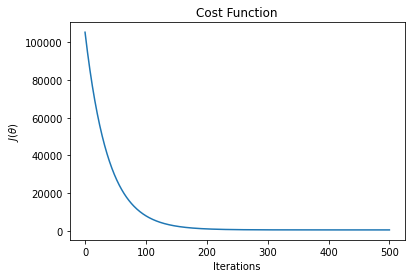

Theta: [[3.50261188]
 [2.02172492]]


In [8]:
theta = linear_regression(X, y)

print("Theta:", theta)

Finally, once we have the values for $\theta$ that minimize our cost function $J(\theta)$, we can produce a final plot for our model.

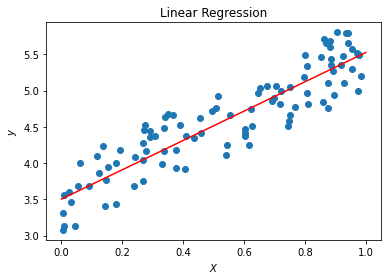

In [9]:
# Plot the prediction line with the original data.
plt.scatter(X, y)
plt.title('Linear Regression')
plt.xlabel(r'$X$')
plt.ylabel(r'$y$')
x = np.linspace(0, 1, 1000)
plt.plot(x, x * theta[1] + theta[0], '-r')
plt.show()